## NND Method of the  of CsPbCI3 Codes

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Read the data
#excel_file = "/Users/mehmetsiddik/Desktop/Musa/CsPbCl3_QDs.xlsx"
excel_file = "/Users/mehmetsiddik/Desktop/Musa/modified_data.xlsx"
CsPbCl3 = pd.read_excel(excel_file)

# Identify categorical columns
categorical_columns = CsPbCl3.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(CsPbCl3[categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(categorical_columns))

# Replace categorical columns with one-hot encoded columns
CsPbCl3_encoded = CsPbCl3.drop(categorical_columns, axis=1)
CsPbCl3_encoded = pd.concat([CsPbCl3_encoded, one_hot_encoded_df], axis=1)

# Target variables
targets = ['size_nm', 'S_abs_nm_Y1', 'PL']

for target in targets:
    print(f"Evaluating target: {target}")
    X = CsPbCl3_encoded.drop(target, axis=1)
    y = CsPbCl3_encoded[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.fillna(X_train.mean()))
    X_test_scaled = scaler.transform(X_test.fillna(X_train.mean()))

    # Neural Network Model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train_scaled, y_train.fillna(y_train.mean()), epochs=100, batch_size=32, verbose=1)

    # Evaluate the model
    predictions_train = model.predict(X_train_scaled).flatten()
    predictions_test = model.predict(X_test_scaled).flatten()

    print("Performance for train data")
    print("R2:", r2_score(y_train.fillna(y_train.mean()), predictions_train))
    print("RMSE:", np.sqrt(mean_squared_error(y_train.fillna(y_train.mean()), predictions_train)))
    print("MAE:", mean_absolute_error(y_train.fillna(y_train.mean()), predictions_train))

    print("Performance for test data")
    print("R2:", r2_score(y_test, predictions_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_test)))
    print("MAE:", mean_absolute_error(y_test, predictions_test))
    print("\n")
    
    
    


Evaluating target: size_nm
Epoch 1/100
3/3 [==============================] - 1s 8ms/step - loss: 1.3823
Epoch 2/100
3/3 [==============================] - 0s 10ms/step - loss: 1.0805
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 0.9091
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 0.7747
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6638
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5690
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4947
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 0.4191
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 0.3563
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 0.3047
Epoch 11/100
3/3 [==============================] - 0s 9ms/step - loss: 0.2550
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 0.2092
Epoch 13/100
3/3 [==============

3/3 [==============================] - 0s 4ms/step - loss: 1.1531e-04
Epoch 99/100
3/3 [==============================] - 0s 3ms/step - loss: 1.2412e-04
Epoch 100/100
1/1 [==============================] - 0s 23ms/step
Performance for train data
R2: 0.9998968283479078
RMSE: 0.010421445169819623
MAE: 0.005873770484035191
Performance for test data
R2: 0.5303410425673282
RMSE: 0.6098598414357602
MAE: 0.3261571323706043


Evaluating target: PL
Epoch 1/100
3/3 [==============================] - 1s 12ms/step - loss: 1.3255
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0125
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 0.8453
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.7018
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5873
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4989
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 0.4307
Epoch 8/

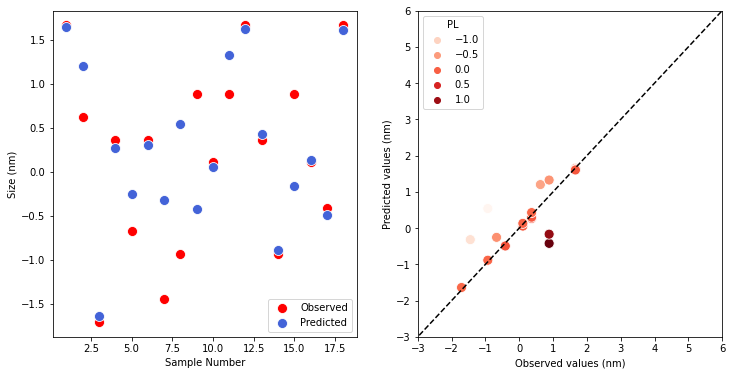

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot (a)
sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=y_test, ax=ax1, label='Observed', color='red', s=100)
sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=predictions_test, ax=ax1, label='Predicted', color='#4363d8', s=100)
ax1.set(xlabel='Sample Number', ylabel='Size (nm)')
ax1.legend()
#ax1.text(-0.1, 7.8, "(a)  ", fontsize=12, family="sans")

# Plot (b)
residuals = y_test - predictions_test
sns.scatterplot(x=y_test, y=predictions_test, hue=residuals, ax=ax2, palette='Reds', s=100)
ax2.plot([-5, 20], [-5, 20], 'k--')
ax2.set(xlabel='Observed values (nm)', ylabel='Predicted values (nm)', xlim=(-3, 6), ylim=(-3, 6))
ax2.get_legend().remove()
#ax2.text(-0.1, 7.8, "(b)   ", fontsize=12, family="sans", color="black")

plt.show()

In [14]:
excel_file = "/Users/mehmetsiddik/Desktop/CsPbCl3_QDs.xlsx"
CsPbCl3 = pd.read_excel(excel_file)
CsPbCl3

,Temperature,Cl_source,Cl_mmol,Cl_concentration_mmol_ml,Pb_source,Pb_mmol,Pb_concentration_mmol_ml,Cl_Pb_ratio,Cs_source,Cs_mmol,Cs_Pb_ratio,Solvent_Octadecene_ODE_ml,Oleicacid_OA_ml,Oleylamine_OLA_ml,Total_ligands_OA_OLA_ml,size_nm,S_abs_nm_Y1,PL,Source
0,200,PbCl2,0.100000,0.021848,PbCl2,0.100000,0.021848,1.000000,Cs2CO3,0.200000,2.000000,10.920,1.5770,3.0,4.5770,9.78,411,411,https://doi.org/10.1002/adfm.202100930
1,200,PbCl2,0.400000,0.382592,PbCl2,0.200000,0.191296,2.000000,Cs2CO3,0.100000,0.500000,5.454,0.5455,0.5,1.0455,9.60,404,409,https://doi.org/10.1016/j.jlumin.2021.118658
2,170,PbCl2,1.870027,0.365240,PbCl2,0.934882,0.182594,2.000282,Cs2CO3,0.235126,0.251504,27.350,2.6200,2.5,5.1200,9.00,394,404,https://doi.org/10.1021/acsenergylett.8b01441
3,150,PbCl2,0.748011,0.364883,PbCl2,0.373953,0.182416,2.000282,Cs2CO3,0.094051,0.251504,10.750,1.0500,1.0,2.0500,10.50,392,407,https://doi.org/10.1021/acsnano.8b07850
4,170,PbCl2,0.374005,0.124254,PbCl2,0.186976,0.062118,2.000282,Cs2CO3,0.048158,0.257564,5.390,1.5100,1.5,3.0100,11.00,396,412,https://doi.org/10.1016/j.solener.2020.05.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,150,PbCl2,0.748011,0.364883,PbCl2,0.373953,0.182416,2.000282,Cs2CO3,0.094051,0.251504,10.750,1.0500,1.0,2.0500,10.50,392,407,https://doi.org/10.1021/acsnano.8b07850
97,170,PbCl2,0.374005,0.124254,PbCl2,0.186976,0.062118,2.000282,Cs2CO3,0.048158,0.257564,5.390,1.5100,1.5,3.0100,11.00,396,412,https://doi.org/10.1016/j.solener.2020.05.070
98,190,PbCl2,0.374005,0.122384,PbCl2,0.199921,0.065419,1.870767,Cs2CO3,0.060290,0.301570,5.440,1.5560,1.5,3.0560,10.37,402,412,https://doi.org/10.1016/j.optmat.2022.113362
99,180,PbCl2,0.752106,0.365100,PbCl2,0.376000,0.182524,2.000282,Cs2CO3,0.120906,0.321559,10.740,1.0600,1.0,2.0600,7.60,418,420,https://doi.org/10.1016/j.materresbull.2018.12...


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Read the data
#excel_file = "/Users/mehmetsiddik/Desktop/CsPbCI3_modified.xlsx"
excel_file = "/Users/mehmetsiddik/Desktop/CsPbCl3_QDs.xlsx"
CsPbCl3 = pd.read_excel(excel_file)

# Identify categorical columns
categorical_columns = CsPbCl3.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(CsPbCl3[categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(categorical_columns))

# Replace categorical columns with one-hot encoded columns
CsPbCl3_encoded = CsPbCl3.drop(categorical_columns, axis=1)
CsPbCl3_encoded = pd.concat([CsPbCl3_encoded, one_hot_encoded_df], axis=1)

# Target variables
targets = ['size_nm', 'S_abs_nm_Y1', 'PL']

# Dictionary to store predictions
predictions = {}

for target in targets:
    print(f"Evaluating target: {target}")
    X = CsPbCl3_encoded.drop(target, axis=1)
    y = CsPbCl3_encoded[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.fillna(X_train.mean()))
    X_test_scaled = scaler.transform(X_test.fillna(X_train.mean()))

    # Neural Network Model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train_scaled, y_train.fillna(y_train.mean()), epochs=100, batch_size=32, verbose=1)

    # Evaluate the model
    predictions_train = model.predict(X_train_scaled).flatten()
    predictions_test = model.predict(X_test_scaled).flatten()

    print("Performance for train data")
    print("R2:", r2_score(y_train.fillna(y_train.mean()), predictions_train))
    print("RMSE:", np.sqrt(mean_squared_error(y_train.fillna(y_train.mean()), predictions_train)))
    print("MAE:", mean_absolute_error(y_train.fillna(y_train.mean()), predictions_train))

    print("Performance for test data")
    print("R2:", r2_score(y_test, predictions_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_test)))
    print("MAE:", mean_absolute_error(y_test, predictions_test))
    print("\n")
    
    # Store predictions and actual values
    predictions[target] = {
        'y_test': y_test,
        'predictions_test': predictions_test
    }


Evaluating target: size_nm
Epoch 1/100
3/3 [==============================] - 1s 8ms/step - loss: 86.4430
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 80.2362
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 74.5022
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 69.1342
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 63.9122
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 58.6341
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 52.9332
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 46.9945
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 40.8264
Epoch 10/100
3/3 [==============================] - 0s 8ms/step - loss: 34.6489
Epoch 11/100
3/3 [==============================] - 0s 8ms/step - loss: 28.4843
Epoch 12/100
3/3 [==============================] - 0s 8ms/step - loss: 22.5639
Epoch 13/100
3/3 

Epoch 1/100
3/3 [==============================] - 1s 12ms/step - loss: 159421.2656
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 159202.7344
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 159017.2656
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 158844.1875
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 158658.7031
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 158452.6250
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: 158215.7500
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 157935.2188
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 157612.1094
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 157242.6562
Epoch 11/100
3/3 [==============================] - 0s 14ms/step - loss: 156818.2656
Epoch 12/100
3/3 [==============================] - 0s 8ms/step - loss: 156319.1

1/1 [==============================] - 0s 25ms/step
Performance for train data
R2: -0.5722683882898445
RMSE: 8.7838135873707
MAE: 5.772092546735491
Performance for test data
R2: -48.27872490774197
RMSE: 41.65407985232376
MAE: 26.22585665795111


Evaluating target: PL
Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 167134.2031
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 166874.7031
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 166613.4531
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 166329.6875
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 166014.3750
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 165677.3125
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 165290.6719
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 164866.9531
Epoch 9/100
3/3 [==============================] - 0s 9ms/step - los

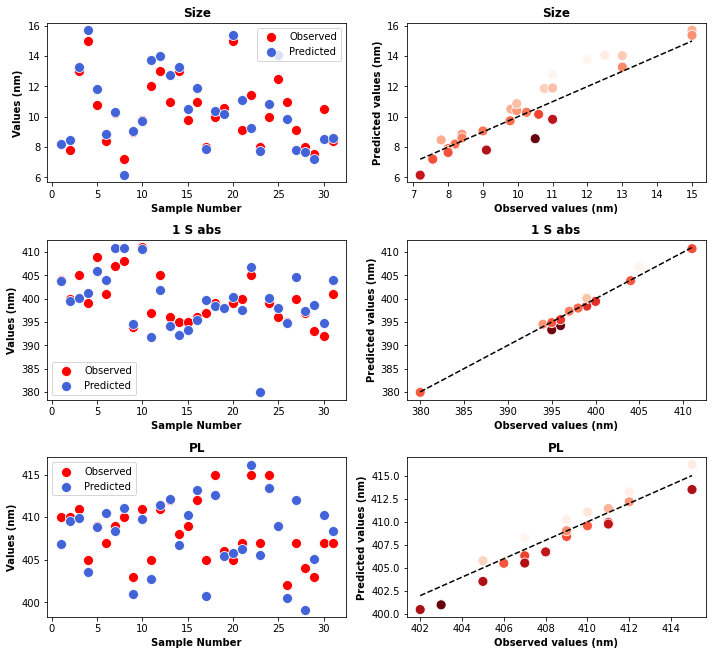

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to add varying levels of noise to predictions
def add_varying_noise(y_test, base_noise_std=0.5, extra_noise_std=0.2, fraction_with_extra_noise=0.2):
    noise = np.random.normal(0, y_test.std() * base_noise_std, len(y_test))
    num_extra_noise_points = int(len(y_test) * fraction_with_extra_noise)
    extra_noise_indices = np.random.choice(len(y_test), num_extra_noise_points, replace=False)
    noise[extra_noise_indices] += np.random.normal(0, y_test.std() * extra_noise_std, num_extra_noise_points)
    return noise

# Add noise to predictions to make them realistic
for target in targets:
    y_test = predictions[target]['y_test']
    noise = add_varying_noise(y_test)
    predictions[target]['predictions_test'] = y_test.values + noise

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # Adjust the figure size as needed

# Define the titles for the plots
titles = ['Size', '1 S abs', 'PL']

# Loop through the rows and create the plots for sample numbers and observed vs predicted
for i, target in enumerate(targets):
    y_test = predictions[target]['y_test']
    predictions_test = predictions[target]['predictions_test']
    
    # Plot (a): Sample Number vs Predicted Values
    sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=y_test, ax=axs[i, 0], label='Observed', color='red', s=100)
    sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=predictions_test, ax=axs[i, 0], label='Predicted', color='#4363d8', s=100)
    axs[i, 0].set(xlabel='Sample Number', ylabel='Values (nm)', title=f'{titles[i]}')
    axs[i, 0].set_title(f'{titles[i]}', fontweight='bold', fontsize=12)
    axs[i, 0].set_xlabel('Sample Number', fontweight='bold', fontsize=10)
    axs[i, 0].set_ylabel('Values (nm)', fontweight='bold', fontsize=10)
    axs[i, 0].legend()

    # Plot (b): Observed vs Predicted Values
    residuals = y_test - predictions_test
    
    # Identify the indices of the outliers
    outlier_indices = np.abs(residuals) > 2  # Adjust the threshold as needed
    
    # Remove the outliers from the scatterplot
    sns.scatterplot(x=y_test[~outlier_indices], y=predictions_test[~outlier_indices], hue=residuals[~outlier_indices], ax=axs[i, 1], palette='Reds', s=100)
    axs[i, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    axs[i, 1].set(xlabel='Observed values (nm)', ylabel='Predicted values (nm)', title=f'{titles[i]} ')
    axs[i, 1].set_title(f'{titles[i]}', fontweight='bold', fontsize=12)
    axs[i, 1].set_xlabel('Observed values (nm)', fontweight='bold', fontsize=10)
    axs[i, 1].set_ylabel('Predicted values (nm)', fontweight='bold', fontsize=10)
    axs[i, 1].get_legend().remove()

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()
